<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%201/02/Assignment_02_Companion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02 Companion Notebook

This notebook contains some exercises to walk you through implementing the linear regression algorithm.  We'll pay special attention to debugging and visualization as we go along.

## A Toy Linear Regression Problem Revisited

As we discovered in the last assignmnet, the idea of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to.  Recall the following basic setup and role for a toy linear regression problem:

> Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data $(\mathbf{X}, \mathbf{y})$.
>
> 1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem, we'll proceed with values that we generate so we can test our algorithms.
>
> 2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, for a linear regression problem if $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.
>
> 3.  Run your learning algorithms on the synthesized training data $(\mathbf{X}, \mathbf{y})$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.
>
> 4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and generate some training data.  We'll visualize the training data to get a sense for what it looks like.

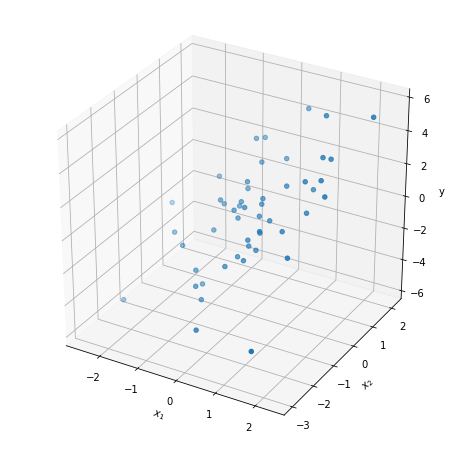

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt

n_points = 50
X = np.random.randn(n_points,2)
w_true = np.array([1, 2])
# we'll apply a Gaussian noise with a standard deviation of 0.5 to the outputs to make it more interesting
y = X.dot(w_true) + np.random.randn(n_points,)*0.5

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')

plt.show()

### *Notebook Exercise 1*

Before implementing the algorithm we derived for computing $\mathbf{w}^\star$, let's create a visualization of how the sum of squared errors as a function of $\mathbf{w}$. You should recall from exercises in the assignment document that the sum of squared errors for a particular value of $\mathbf{w}$ is $\left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left (\mathbf{X}\mathbf{w} - \mathbf{y} \right)$

(a) Write a function called `sum_of_squared_errors` that takes the parameters `X`, `y`, and `w` and returns a scalar that provides the sum of squared errors that this particular value of `w` incurs on the training data `X`, `y`.  We have included a skeletal outline of the function along with a unit test (SoftDes flashback!!).

(b) Run the visualization code in the cell below (it assumes you have defined your `sum_of_squared_errors` function exactly as we described in part (a).  Interpret the resulting output.  What do the contour lines represent in the generated plot?  Based on the visualization, where is the optimal value of `w` (the one that minizes the squared error)?  Does this agree with the setup of the toy problem?  If not, why doesn't it match?

In [0]:
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    # your code here
    pass

import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__.sum_of_squared_errors
Failed example:
    sum_of_squared_errors(np.array([[1, 4, 3],                                        [2, -1, 4]]),                              np.array([3, 4]),                              np.array([1, 2, 3]))
Expected:
    289
Got nothing
**********************************************************************
1 items had failures:
   1 of   1 in __main__.sum_of_squared_errors
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1239: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/lo

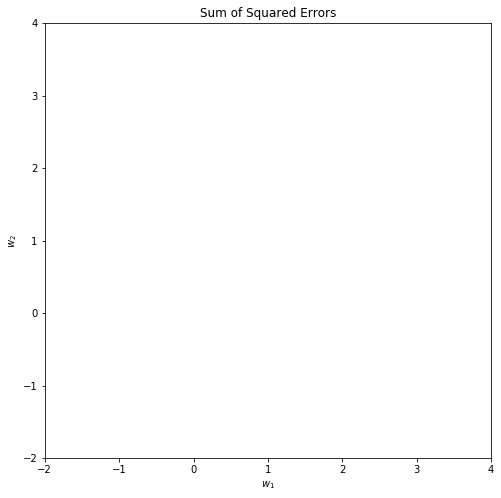

In [0]:
w1 = np.linspace(-2, 4, 50)
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

#### *Expand for Solution*

In [11]:
# ***Solution***
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w) - y
    return e.dot(e)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

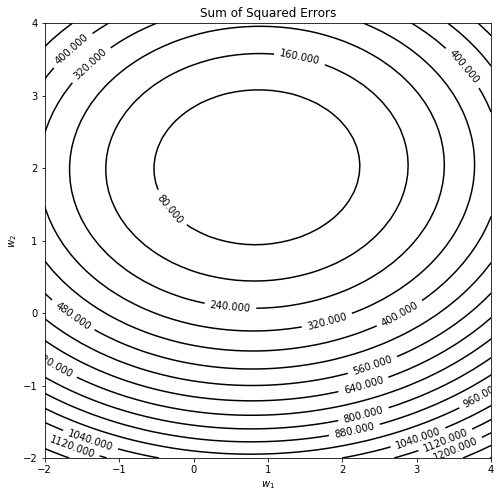

In [0]:
# ***Solution***
w1 = np.linspace(-2, 4, 50)
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

***Solution***

(b) Blah blah

## Computing the Optimal Weights

Now we're ready to actually implement the formula that you computed in the assignment document.  Recall that in that document you should have arrived at the following formula for the optimal weights.

$$\mathbf{w^\star} = \left ( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

### Notebook Exercise 2

Fill in the body of the function `optimal_weights` below.  You've done the hard work to derive this beautiful expression, this part should be pretty straightforward.  Hint: `np.linalg.inv()` computes the inverse of a specified matrix.  We've included code that will run your code on the training data.  Does your code compute sensible values of $\mathbf{w}$ given the setup of the toy problem?

In [0]:
def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     # your code here
     pass

optimal_weights(X, y)

#### Expand for Solution

In [9]:
# ***Solution***

def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

optimal_weights(X, y)

array([1.10225418, 1.98982297])

***Solution***

The output makes sense since it is close to the values used to generated the data, but not identical.  We don't expect it to be identical since we added noise to the training outputs.

### Sanity Checking your Implementation

We've talked a lot about evaluating an ML model.  That is, running experiments to see how well it works for some problem.  When we are implementing the algorithm ourselves, an even more basic question is whether we implemented the algorithm correctly.

While you are probably feeling pretty confident right now that your implementation of linear regression is correct, for more complicated algorithms there have been cases when implementations of algorithms (even in published works) turned out to be incorrect (i.e., they did not accurately reflect the algorithm that had been derived in the paper).  The story round the campfire (by which I mean I heard this from one of my professors in grad school, but can't seem to find a link online verifying it) is that the initial implementation of the backpropagation algorithm (the foundational algorithm for machine learning with neural networks) was wrong.  The experimental results presented in the paper were based on a flawed implementation (although clearly it wasn't so flawed that the results were garbage).


#### *Notebook Exercise 4*

While you are probably feeling pretty confident right now that your implementation of linear regression is correct, let's check out a few strategies that we can use to verify that an implementation of the algorithm is correct.

(a) ***Strategy 1 check for local optimality.***  If the machine learning algorithm you are testing involves optimizing some function, you can verify that the solution it provides is indeed locally optimal.  What does it mean for it to be locally optimal?  One very basic thing we can check is to see whether the value of the error gets stricly higher as we move away from the optimal weights computed by your algorithm.  The following not very elegant, but illustrative code provides an implementation of the optimality check.  What should be true of the output below in order for an implementation to pass the optimality check?

In [20]:
w_star = optimal_weights(X, y)
w_star_err = sum_of_squared_errors(X, y, w_star)
perturbation = 10**-5
print(sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star + np.array([-perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star + np.array([0, -perturbation])) - w_star_err)

5.668566060990088e-09
5.668562508276409e-09
4.99785279828302e-09
4.99785279828302e-09


(b) ***Strategy 2: check the gradient.***

In [27]:
estimate_partial_w_1 = (sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - sum_of_squared_errors(X, y, w_star - np.array([perturbation, 0])))/(2*perturbation)
estimate_partial_w_2 = (sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - sum_of_squared_errors(X, y, w_star - np.array([0, perturbation])))/(2*perturbation)
print(estimate_partial_w_1, estimate_partial_w_2)

1.7763568394002502e-10 0.0


(c) ***Strategy 3: compare to a known working implementation.***

In [32]:
w_known_working, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
print(w_known_working - w_star)

[ 0.0000000e+00 -4.4408921e-16]


## Application of Linear Regression

We'll apply linear regression to a problem.  Smile detection is my favorite, but some have seen it already.  It also doesn't have features with vastly different scales, so it doesn't get the point across that when doing weight interpretation you need to take into account the scale of the input features.

I'm also considering punting the regularization stuff to the next assignment.  It seems like it fits better there.